## 오늘의 목표! (얼룩말 책 9장_개정판 10장)

- 오늘은 opencv-python을 활용한 객체 검출을 알아봅니다.           
- 텐서플로우가 적용된 단원이니만큼 이미 알고계시는 내용이 많으시겠지만,         
- 여기에 적용된 이론적 배경을 바탕으로 보시면서 공부해보시면 또 다른 시각에서 opencv를 활용해 볼 수 있을 것 같습니다.            

### 목차

1. 파이썬 객체검출이란?           
2. 텐서플로우       
3. 객체 검출         
4. 정규 표현식        
5. 객체 추적        
6. 객체 인식

## 1. 파이썬 객체 검출이란?          
---

 - 객체 검출 : 이미지에서 의미있는 객체를 탐지하는 알고리즘    
     > 이미지 상에서 여러 객체를 식별하고 분석하는 것은 컴퓨터 비전의 궁극적인 목표 중 하나로서, 객체 검출을 통해 특정 사물이나 동물 등을 탐지해서 어떤 의미를 지닌 객체임을 인식하는 데 사용할 수 있다.        
     
- 검출은 __이미지에서 특정 클래스(사람, 건물, 대상)를 찾는 것__ 이며,      
- 인식은 __검출된 대상이 어떤 객체인지 식별하는 것을 의미한다.__    
> 사진에서 얼굴 검출(얼굴을 찾기) -> 얼굴 인식(누구인지 알기)            

- 객체 검출은 머신러닝을 활용해 해당 객체만이 갖는 특징을 분석하여 찾는다. 각 객체가 갖는 특정 패턴을 찾아 학습을 진행한다.     
- 객체 검출을 위한 단계는 __크게 세 가지로 나눌 수 있다.__       
    ###### 1. Tensorflow object detection api의 __학습이 완료된 모델 그래프로 이미지 상에서 객체를 검출__
        - COCO 데이터셋 활용
    ###### 2. 라벨 맵을 불러와 검출되 객체의 이름을 표시한다. 
        - 프로토콜 버퍼 형식의 라벨 맵 파일 사용       
        - 이 때, 프로토콜 버퍼를 읽기 위해 정규표현식을 활용해 내용을 리스트나 딕셔너리 형식으로 변환
    ###### 3. 모델을 통해 검출된 정보와 라벨 맵의 정보를 매칭시켜 OpenCV 라이브러리로 이미지 위에 표시        
    
    
- 각 단계는 다양하게 응용될 수 있다. ex) 학습이 완료된 모델 그래프를 활용하여 문자열 검출 등에 활용 등..

## 2. 텐서플로우              
---      

- 텐서플로우는 구글 브레인팀에서 제작하였으며, __아파치 라이선스 2.0__ 으로 공개되어 있다.
    * 아파치 라이선스 : 해당 소프트웨어에서 파생된 프로그램을 제작할 수 있으며, 저작권을 양도, 전송할 수 있는 라이선스      
    
- 텐서플로우는 파이썬의 Numpy 라이브러리를 활용하여 수학적인 계산을 자동으로 처리한다.      
- 파이썬, C, C++, R 등에서 지원한다.      
- CPU와 GPU를 활용해 연산을 진행한다.      
- __텐서플로우는 NVIDIA 그래픽카드만 지원한다...!__     

- 아나콘다를 활용해 텐서플로우를 설치한다.    

> Q1. tf.__version__ 명령을 통해 설치된 텐서플로우 버전을 확인해봅시다.

In [1]:
import tensorflow as tf

print(tf.__version__)

2.4.1


- 텐서플로우 설치 후, __Tensorflow detection model zoo__ 를 활용할 수 있다.      
- pre-trained된 모델 중 COCO 데이터셋으로 훈련된 모델을 사용해 예제를 진행해보자.     

> Q2. 이 예제에서는 __SSD MobileNet v2 320x320__ 모델을 사용합니다. 해당 모델을 다운로드해봅시다.

> [Q2는 여기를 참조 : SSD MobileNet v2 320x320를 다운로드합니다.](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)

> Q3. 마찬가지로, 객체 이름을 표시하기 위해 라벨 파일이 저장된 페이지를 방문하여 라벨 맵을 다운로드해봅시다.

> [Q3는 여기를 참조 : mscoco_label_map.pbtxt를 다운로드합니다.](https://github.com/tensorflow/models/tree/master/research/object_detection/data)

## 3. 객체 검출              
---

- 훈련된 추론 모델을 읽어 파이썬에서 활용하려면 Tensorflow I/O 래퍼를 활용한다.      
- 로컬을 비롯해 구글 클라우드나 하둡에서도 데이터를 읽어올 수 있다.    
- I/O 래퍼는 텍스트, 이진(binary), 로우(raw) 파일을 불러올 수 있다.   

- 텐서플로우 파일시스템 함수로 추론 모델 그래프 파일을 불러온다. 

> Q4. 예제 9.2(그래프 정의) 를 참조하여 그래프를 읽어오세요.

In [1]:
#예제 9.2
import os
import numpy as np
import tensorflow as tf

model_path = os.getenv('HOME')+ '/zoo_test/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model'
print(model_path)

model = tf.saved_model.load(model_path)
print('모델 세팅 완료')

/home/ssac23/zoo_test/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model
모델 세팅 완료


- 학습된 모델 그래프 파일은 이진(binary) 파일이므로 이진 모드로 열어서 읽는다.     
- 따라서 텐서플로우 파일 시스템 모드로 rb(read, binary)를 사용한다. 

> Q5. 동영상을 읽어오고, 이를 불러온 그래프에 적용할 수 있도록 한다. (구판과 개정판의 소스코드가 다르므로, 개정판 깃헙을 참고하였습니다.)

In [3]:
import cv2
import numpy as np
import tensorflow as tf

#모델과 비디오를 불러온다.
#model = tf.saved_model.load("./ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("bird.mp4")

#영상을 읽는 동안
while True:
    
    #결과, 프레임의 튜플 반환
    ret, frame = capture.read()

    #가져온 프레임 수가 끝 프레임 수와 같으면 break
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break

    #---구판에만 있는 resize코드(아마 개정판이 되며 동영상 자체 사이즈를 수정했나봅니다.)--
    #input_img = cv2.resize(frame, (300,300))
    #-----------------------------------------------------------------------
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]

In [4]:
input_tensor

<tf.Tensor: shape=(1, 1080, 1920, 3), dtype=uint8, numpy=
array([[[[127, 105,  85],
         [127, 105,  85],
         [127, 105,  85],
         ...,
         [110,  89,  66],
         [110,  89,  66],
         [110,  89,  66]],

        [[127, 105,  85],
         [127, 105,  85],
         [127, 105,  85],
         ...,
         [110,  89,  66],
         [110,  89,  66],
         [110,  89,  66]],

        [[127, 105,  85],
         [127, 105,  85],
         [127, 105,  85],
         ...,
         [110,  89,  66],
         [110,  89,  66],
         [110,  89,  66]],

        ...,

        [[ 32,  23,  17],
         [ 32,  23,  17],
         [ 31,  22,  16],
         ...,
         [135, 101,  81],
         [135, 101,  81],
         [135, 101,  81]],

        [[ 32,  23,  17],
         [ 32,  23,  17],
         [ 32,  23,  17],
         ...,
         [135, 101,  81],
         [135, 101,  81],
         [135, 101,  81]],

        [[ 32,  23,  17],
         [ 32,  23,  17],
         [ 33,  

- [위에서 사용한 동영상은 여기서 View raw를 눌러 다운받으세요.](https://github.com/wikibook/opencv4/blob/opencv4-rev/Chapter10/Example-10-03-Py/bird.mp4)

- 위의 예제를 통해, 불러운 동영상의 프레임마다 객체를 분석할 수 있도록 준비한다.        
- 위의 소스코드에서 에러가 난다면, 아마 학습된 이미지와의 사이즈 차이 때문일 것이다.     
(구판에서는 소스코드에 이미지 리사이즈 코드가 포함되어 있습니다.)    


- 동영상에서 프레임을 불러와, 이 프레임을 추론할 이미지로 변경한다.      
- 추론 모델은 RGB 채널, 320X320 크기에서 추론을 수행하므로 각각의 프레임을 이에 맞추어 변경해준다.     

In [5]:
output_dict = model.signatures["serving_default"](input_tensor)

classes = output_dict["detection_classes"][0]
scores = output_dict["detection_scores"][0]
boxes = output_dict["detection_boxes"][0]

In [6]:
print(output_dict)

{'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>, 'raw_detection_scores': <tf.Tensor: shape=(1, 1917, 91), dtype=float32, numpy=
array([[[0.00252664, 0.01344305, 0.00446457, ..., 0.0060125 ,
         0.00503874, 0.00784412],
        [0.00252664, 0.00412002, 0.00183848, ..., 0.00223041,
         0.00363556, 0.00295234],
        [0.00252637, 0.00425652, 0.00215542, ..., 0.00247598,
         0.00502285, 0.00277689],
        ...,
        [0.00888222, 0.0288665 , 0.01240557, ..., 0.02077118,
         0.00904217, 0.01886749],
        [0.00888136, 0.03631955, 0.0102171 , ..., 0.01495269,
         0.01051027, 0.02438542],
        [0.00888175, 0.21046466, 0.02616253, ..., 0.04763082,
         0.02456886, 0.03730193]]], dtype=float32)>, 'raw_detection_boxes': <tf.Tensor: shape=(1, 1917, 4), dtype=float32, numpy=
array([[[-9.67216864e-03,  1.42401084e-04,  4.79162894e-02,
          3.88094932e-02],
        [-8.98026675e-03, -8.26443583e-02,  6.72250912

In [ ]:
'num_detections'
'raw_detection_boxes'
'detection_multiclass_scores'
'detection_scores'
'detection_anchor_indices'
'detection_boxes'
'detection_classes'

In [8]:
print(type(output_dict))
print(type(classes))
print(type(scores))
print(type(boxes))

<class 'tensorflow.python.saved_model.load._WrapperFunction'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


- 여기부터는 완전 설명이 다르기 때무네... 발표할 때 개정판을 가진 분들의 해설을 기다려봅니다.

> Q6. 아래의 full 버전 코드에 직접 주석을 달아보며 흐름을 파악해봅시다.

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

#model = tf.saved_model.load("./ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("bird.mp4")

while True:
    ret, frame = capture.read()

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break

    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]

    
    output_dict = model.signatures["serving_default"](input_tensor)

    classes = output_dict["detection_classes"][0]
    scores = output_dict["detection_scores"][0]
    boxes = output_dict["detection_boxes"][0]

    #프레임의 가로세로
    height, width, _ = frame.shape
    
    #인덱스, 스코어를 돌려서
    for idx, score in enumerate(scores):
        
        #만약 추론의 confidence가 0.7 이상이라면
        if score > 0.7:
            
            #추론된 클래스 아이디
            class_id = int(classes[idx])
            #해당 박스
            box = boxes[idx]

            #박스를 그리기 위한 좌표설정
            x1 = int(box[1] * width)
            y1 = int(box[0] * height)
            x2 = int(box[3] * width)
            y2 = int(box[2] * height)

            #추론한 프레임에 사각형을 그려줌
            #추론한 프레임에 클래스 인덱스와 confidence score를 그려줌
            cv2.rectangle(frame, (x1, y1), (x2, y2), 255, 1)
            cv2.putText(frame, str(class_id) + ":" + str(float(score)), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 255, 255), 1)

    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(33) == ord("q"):
        break

## 4. 정규표현식

- 프로그래밍에서 사용하는 형식 언어           
- 특정한 규칙을 가진 문자열을 검색, 분리, 치환하는 데 주로 활용됨      
- 특정한 패턴과 일치하는 텍스트를 입력값에서 찾아 반환한다.      
- __정규 표현식을 사용하지 않는 경우 매우 복잡한 코드를 작성해야 하지만, 정규표현식을 활용할 경우 코드가 매우 간결해지며 유사한 문자까지 일치시켜 검색할 수 있다.__

- 정규표현식으로 라벨 맵 파일에서 특정 패턴을 찾으려면 __라벨 맵 파일의 구조를 알아야 한다.__  
- 라벨 맵 파일 구조는 다음과 같다.

![라벨맵파일구조](./PostingPic/10_라벨맵파일구조.png)

- item 필드 안에 사전 형식의 name, id, display_name 으로 구성되어 있다.        
- 라벨 맵 파일에서 필요한 값은 id와 display_name 이다.        

- 따라서, 라벨 맵 파일에서 시각적으로 확인할 수 있는 이름을 가져오기 위해 파이썬에 내장된 파일시스템 함수를 활용한다.

> Q7. 아래 예제를 실행시키고 결과를 확인해보세요.

In [3]:
#라벨 맵 파일 불러오기 예제
with open("mscoco_complete_label_map.pbtxt", "rt") as f:
    pb_classes = f.read().rstrip("\n").split("\n")

    print(pb_classes[0])
    print(pb_classes[1])
    print(pb_classes[2])
    print(pb_classes[3])
    print(pb_classes[4])

- 이제 내부를 확인했으므로, __정규표현식 함수를 통해 파싱한다.__    
- 정규표현식을 활용하기 위해 __import re__ 하여 패턴과 일치하는 문자열을 반환한다.

> Q8. re.findall() 함수와 re.search() 함수를 설명하는 공식 가이드를 찾아보고, 각각의 옵션을 설명해주세요.

> Q9. 아래의 예제(정규표현식을 활용해 입력 문자열에서 패턴 검출하기)를 수행하고, 주석을 달아보세요.

In [23]:
print(len(pb_classes))

3811


- 정규 표현식의 패턴을 구성할 때, 일반적으로 패턴의 문자열은 로 문자열 표기법(raw string notation)으로 작성한다.      
- 로 문자열 표기법은 문자열에 'r'을 포함하여 작성한다.      

> Q10. 아래의 코드는 텐서플로우를 활용한 객체 검출의 전체 코드입니다. 전체 순서를 파악해보세요.

In [4]:
import re
import cv2
import numpy as np
import tensorflow as tf


with open("mscoco_complete_label_map.pbtxt", "rt") as f:
    pb_classes = f.read().rstrip("\n").split("\n")
    classes_label = dict()

    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall("\d+", pb_classes[i + 2])[0])
        pattern = 'display_name: "(.*?)"'
        pb_text = re.search(pattern, pb_classes[i + 3])
        classes_label[pb_classId] = pb_text.group(1)

#model = tf.saved_model.load("./ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("bird.mp4")

while True:
    ret, frame = capture.read()

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break

    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures["serving_default"](input_tensor)

    classes = output_dict["detection_classes"][0]
    scores = output_dict["detection_scores"][0]
    boxes = output_dict["detection_boxes"][0]

    height, width, _ = frame.shape
    for idx, score in enumerate(scores):
        if score > 0.7:
            class_id = int(classes[idx])
            box = boxes[idx]

            x1 = int(box[1] * width)
            y1 = int(box[0] * height)
            x2 = int(box[3] * width)
            y2 = int(box[2] * height)

            cv2.rectangle(frame, (x1, y1), (x2, y2), 255, 1)
            cv2.putText(frame, classes_label[class_id] + ":" + str(float(score)), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 255, 255), 1)

    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(33) == ord("q"):
        break

IndexError: list index out of range

## 5. 객체 추적

- 이전까지의 스텝이 이미지 안의 __특정 객체를 검출하는 기술을 살펴봤다면, 이제는 객체의 움직임을 추적하는 알고리즘을 살펴보자.__          


- 객체 추적은 영상에서 
    1. 객체의 움직임      
    2. 누적 경로        
    3. 예상 경로        
    4. 속도       
    5. 속력
    등을 확인하는 기술이다.     
    
    
- 주요 추적 방식으로는        
    1. 특징점 추적(Point Tracking) : 움직이는 객체의 특징점을 찾음         
    2. 커널 기반 추적(Kernel based Tracking) : 일정 영역 내부의 움직임을 찾음     
    3. 실루엣 기반 추적(Silhouette based Tracking) : 복잡한 형태를 단순화하여 움직임을 찾음       
    등이 있다.

- __광학 흐름(Optical Flow)를 통해 위와 같은 방식의 움직임을 검출할 수 있다.__       
- 광학 흐름은 영상 내 물체의 움직임 패턴을 말한다. 이전 프레임과 다음 프레임 간 픽셀이 이동한 방향과 거리 분포이다.      
- 밝기 변화가 거의 없고, 일정 블록 내의 모든 픽셀이 모두 같은 운동을 한다고 가정하여 움직임을 추정한다.     
- 다른 방식으로는 특정 점만 사용하거나, 일정 블록 내의 움직임을 판단하여 감지하는 방식이 있다.  
- __주로 동작 감지, 물체 추적, 구조 분석에 이용한다.__   

- 여기서는 파네백 광학 흐름(다항식 확장 알고리즘)을 활용해, __각 픽셀의 이웃을 근사해 객체를 추적한다.__  
- 밀집 광학 흐름(Dense optical flow) 중의 하나이며, 이미지의 모든 픽셀에 모션 벡터를 각각 할당한다.   
- 특징 점에 집중하는 것이 아닌 모든 점에 대해 밀도가 높은 광학 흐름을 찾으므로, __정확도는 높지만 연산량이 많아진다.__

> Q11. 다른 밀집 광학 흐름 알고리즘도 있을까요? 밀집 광학 알고리즘에 대해 알아보고 요약하여 알려주세요.

### 파네벡 광학 흐름 함수

- [이 블로그 주인분이 설명을 잘 해놓으셨더군요](https://deep-learning-study.tistory.com/278)

- 파네벡 광학 흐름 함수는 8비트 단일 채널 이미지인 __이전 프레임과 다음 프레임을 사용하여 두 프레임 간의 광학 흐름을 계산한다.__           

![파네벡](./PostingPic/10_파네벡.png)

- 따라서, 이전 프레임과 비교하여 객체의 움직임과 방향을 위와 같이 표시할 수 있게 된다.

> Q12. 파네벡 광학 함수를 파이썬 공식 가이드에서 찾아, 옵션을 설명해보세요.(cv2.calcOpticalFlowFarneback)

In [2]:
#이전의 풀 버전 코드에서, 파네벡 광학 함수를 적용하기 위해 몇 줄을 추가해봅시다.
# (주석처리)된 부분이 이전의 풀 버전과 비교하여 새로 추가된 부분입니다.

In [25]:
import re
import cv2
import numpy as np
import tensorflow as tf


with open("mscoco_complete_label_map.pbtxt", "rt") as f:
    pb_classes = f.read().rstrip("\n").split("\n")
    classes_label = dict()

    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall("\d+", pb_classes[i + 2])[0])
        pattern = 'display_name: "(.*?)"'
        pb_text = re.search(pattern, pb_classes[i + 3])
        classes_label[pb_classId] = pb_text.group(1)

model = tf.saved_model.load("./ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("bird.mp4")
#ret, prev_frame = capture.read()
#prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while True:
    ret, next_frame = capture.read()
    next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
    frame = next_frame.copy()

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break

    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures["serving_default"](input_tensor)

    classes = output_dict["detection_classes"][0]
    scores = output_dict["detection_scores"][0]
    boxes = output_dict["detection_boxes"][0]

    height, width, _ = frame.shape
    for idx, score in enumerate(scores):
        if score > 0.7:
            class_id = int(classes[idx])
            box = boxes[idx]

            x1 = int(box[1] * width)
            y1 = int(box[0] * height)
            x2 = int(box[3] * width)
            y2 = int(box[2] * height)

            cv2.rectangle(frame, (x1, y1), (x2, y2), 255, 1)
            cv2.putText(frame, classes_label[class_id] + ":" + str(float(score)), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 255, 255), 1)

    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, flow=None, pyr_scale=0.5, 
                                        levels=3, winsize=15, iterations=3, poly_n=5, poly_sigma=1.1, 
                                        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN)

    for i in range(x1, x2, 15):
        for j in range(y1, y2, 15):
            x = int(flow[j, i, 0])
            y = int(flow[j, i, 1])

            cv2.circle(frame, (i, j), 1, (0, 0, 255), 1)
            cv2.line(frame, (i, j), (i + x, j + y), (0, 255, 255), 1)
            cv2.circle(frame, (i + x, j + y), 1, (0, 255, 255), 2)

    #prev_gray = next_gray.copy()
    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(33) == ord("q"):
        break

IndexError: list index out of range

> Q13. 위에서 주석처리된 함수는 어떤 기능을 하나요? 이 추가된 줄들은 어떤 역할을 하기 위해 추가되었나요?

#### 파네벡 광학 흐름을 적용하여 객체 내부의 흐름을 시각적으로 표현한 소스코드

In [27]:
import re
import cv2
import numpy as np
import tensorflow as tf


with open("mscoco_label_map.pbtxt", "rt") as f:
    pb_classes = f.read().rstrip("\n").split("\n")
    classes_label = dict()

    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall("\d+", pb_classes[i + 2])[0])
        pattern = 'display_name: "(.*?)"'
        pb_text = re.search(pattern, pb_classes[i + 3])
        classes_label[pb_classId] = pb_text.group(1)

model = tf.saved_model.load("./ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("bird.mp4")
ret, prev_frame = capture.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while True:
    ret, next_frame = capture.read()
    next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
    frame = next_frame.copy()

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break

    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures["serving_default"](input_tensor)

    classes = output_dict["detection_classes"][0]
    scores = output_dict["detection_scores"][0]
    boxes = output_dict["detection_boxes"][0]

    height, width, _ = frame.shape
    for idx, score in enumerate(scores):
        if score > 0.7:
            class_id = int(classes[idx])
            box = boxes[idx]

            x1 = int(box[1] * width)
            y1 = int(box[0] * height)
            x2 = int(box[3] * width)
            y2 = int(box[2] * height)

            cv2.rectangle(frame, (x1, y1), (x2, y2), 255, 1)
            cv2.putText(frame, classes_label[class_id] + ":" + str(float(score)), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 255, 255), 1)

    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=3, poly_n=5, poly_sigma=1.1, flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
    magnitude, angle = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    angle = angle / 2

    hsv = np.zeros_like(next_frame)
    hsv[:, :, 0] = angle
    hsv[:, :, 1] = magnitude
    hsv[:, :, 2] = 255
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    prev_gray = next_gray.copy()
    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(33) == ord("q"):
        break

IndexError: list index out of range

In [29]:
for i in range(0, len(pb_classes)):
    pb_classId = int(re.findall("\d+", pb_classes[i + 2])[0])

IndexError: list index out of range

- 파네벡 광학 흐름 함수 적용 부분을 표시하기 위해 __극좌표 변환 함수__ 가 추가되었다.    
- 해당 내용을 살펴보자.

- 파네벡 광학 흐름 함수는 프레임 내의 모든 픽셀에 대한 광학 흐름을 찾으므로 정확도는 높지만 연산량이 많다.    
- 파네벡 함수는 검출 결과를 x와 y 성분으로 반환해 이미지 형태로 표시하기 어렵다.    
- 하지만 __극좌표 변환 함수와 정규화 함수를 활용하면 좌표 성분을 벡터의 길이와 각도로 변환해 이미지 형태로 구성할 수 있다.__  

[직교좌표계와 극좌표계 : 이 블로그 정리가 아주 깔끔하네요!](https://ride-or-die.info/polar-coordinates/)

### 루카스 카나데 알고리즘       

- 우리는 앞에서 파네벡 광학 흐름 함수를 살펴보았지만, 이 알고리즘은 특성상 __계산 과정이 복잡하고, 모든 픽셀에 대해 움직임을 계산하므로 cost가 많이 든다.__    
- 이를 해결하기 위해 우리는 __영상에서 트래킹하기 쉬운 몇 개의 특징점을 검출해 해당 특징점에 대한 광학 흐름을 계산하는 희소 광학 흐름(Sparse optical flow) 알고리즘인 루카스 카나데 알고리즘을 알아본다.__   

- 희소 광학 흐름은 __특징점에 대해서만 광학 흐름을 계산하므로, 연산시간이 짧고 신뢰도가 높지만__, __특징점을 제대로 검출하지 못할 때 정확성이 떨어진다는 단점이 있다.__ 

- 루카스 카나데 알고리즘은 기본적으로 다음의 세 가지 가정에 의해 광학 흐름을 판단한다.
    1. 밝기 항상성(Brightness Constancy) :
        - 프레임 내의 객체는 프레임 사이에서 움직이기 때문에 객체를 구성하는 픽셀은 변하지 않을 것이고, 따라서 그레이 스케일 이미지에서 트래킹을 시도할 때 픽셀의 밝기는 변하지 않는다.   
    
    2. 시간적 지속성(Temporal Coherence) :
        - 프레임 내 객체의 움직임은 프레임 변화에 비해 느리게 움직인다. 프레임 간의 객체의 움직임은 거의 없어 상대적으로 객체는 움직임이 적다.       
        
    3. 공간적 지속성(Spatial Coherence) :      
        - 프레임 내에서 인접한 픽셀들은 같은 객체로 볼 수 있으며 해당 픽셀은 동일한 움직임을 보인다.

- 루카스 카나데 알고리즘은 __윈도우에 대한 정보로 움직임을 검출__ 하기 때문에 희소 상황에서도 높은 검출율을 보일 수 있으나, 윈도우는 프레임에 비해 작은 크기를 가지므로 큰 움직임이 발생할 경우 윈도우 외부로 픽셀이 움직일 수도 있어 검색이 어려울 수도 있다.      
- 윈도우 크기에 따른 불확실성을 감소시키기 위해, 이미지 피라미드를 활용한다. 가장 상단의 피라미드에서 광학 흐름을 계산하고 다음 피라미드에서 추정 결과를 사용한다. 이 연산을 가장 하단의 피라미드에 닿을 때까지 반복해 초기 가정을 개선한다.

> Q14. 루카스 카나데 함수를 파이썬 공식 가이드에서 찾아, 옵션을 설명해보세요.(cv2.calcOpticalFlowPyrLK)

In [ ]:
#이전의 풀 버전 코드에서, 루카스카나데 광학 함수를 적용하기 위해 몇 줄을 추가해봅시다.
# (주석처리)된 부분이 이전의 풀 버전과 비교하여 새로 추가된 부분입니다.

In [ ]:
import re
import cv2
import numpy as np
import tensorflow as tf


with open("mscoco_complete_label_map.pbtxt", "rt") as f:
    pb_classes = f.read().rstrip("\n").split("\n")
    classes_label = dict()

    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall("\d+", pb_classes[i + 2])[0])
        pattern = 'display_name: "(.*?)"'
        pb_text = re.search(pattern, pb_classes[i + 3])
        classes_label[pb_classId] = pb_text.group(1)

model = tf.saved_model.load("./ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("bird.mp4")
#ret, prev_frame = capture.read()
#prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
#prev_pts = cv2.goodFeaturesToTrack(prev_gray, mask=None, maxCorners=1000, qualityLevel=0.1, minDistance=5, blockSize=9)

while True:
    #ret, next_frame = capture.read()
    #next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
    #frame = next_frame.copy()
    prev_pts = cv2.goodFeaturesToTrack(prev_gray, mask=None, maxCorners=1000, qualityLevel=0.1, minDistance=5, blockSize=9)

    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break

    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures["serving_default"](input_tensor)

    classes = output_dict["detection_classes"][0]
    scores = output_dict["detection_scores"][0]
    boxes = output_dict["detection_boxes"][0]

    height, width, _ = frame.shape
    for idx, score in enumerate(scores):
        if score > 0.7:
            class_id = int(classes[idx])
            box = boxes[idx]

            x1 = int(box[1] * width)
            y1 = int(box[0] * height)
            x2 = int(box[3] * width)
            y2 = int(box[2] * height)

            cv2.rectangle(frame, (x1, y1), (x2, y2), 255, 1)
            cv2.putText(frame, classes_label[class_id] + ":" + str(float(score)), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 255, 255), 1)

    if len(prev_pts) > 0:
        next_pts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, next_gray, prev_pts, None)

        for i, (prev_pt, next_pt) in enumerate(zip(prev_pts, next_pts)):
            xp, yp = prev_pt.ravel()
            xn, yn = next_pt.ravel()
            
    #prev_gray = next_gray.copy()
    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(33) == ord("q"):
        break

> Q15. 위에서 주석처리된 함수는 어떤 기능을 하나요? 이 추가된 줄들은 어떤 역할을 하기 위해 추가되었나요?

## 6. 객체 인식

- 위에서 활용한 방법은 텐서플로우를 활용해 객체를 검출하고, 인식하였다.    
- 이제 OpenCV 함수로 객체를 인식해보자.   

- __학습이 아닌 방법으로 객체를 인식하기 위해서는 특징점(Key Point)과 기술자(Descriptor)를 활용한다.__

- 특징점 : 영상에서, 배경과 구분될 수 있는 객체의 고유한 식별 지점    
         서로 다른 이미지에서도 하나 이상의 점으로 특별하게 구분할 수 있는 작은 부분       
        ex)해리스 코너     
        
- 기술자 : 서로 다른 이미지에서 특징점이 어떤 연관성을 가졌는지 구분하게 함 
          기술자는 각 특징점이 가진 지역적 특징 정보를 가지고 있음     
          서로 다른 특징점에서 차이를 구분해 특징점끼리 서로 매칭되게 함
          
          
- 앞서 배운 __광학 흐름은 유사한 프레임 간에 특징점을 찾아 프름만을 계산하고, 객체의 구성요소나 식별 정보를 파악하지는 않는다.__     
- 하지만 기술자는 유사한 이미지 뿐만 아니라 완전히 다른 이미지도 매칭할 수 있다.  
- __기술자를 응용하면 완전히 다른 이미지나 빠른 프레임에서도 객체를 추적할 수 있게 된다.__       

- OBR(Oriented FAST and rotated BRIEF) 알고리즘은 FAST(Feature from Accelerated Segment Test) 알고리즘, BRIEF(Binary Robust Independent Elementary Features) 알고리즘, 해리스 코너 알고리즘을 결합한 알고리즘이다.
    1. FAST 알고리즘 :
        - 픽셀 P와 픽셀 주변의 작은 원 위에 있는 픽셀의 집합을 비교하는 방식    
        - 픽셀 P의 주변 픽셀에 임계갓을 적용해 어두운 픽셀, 밝은 픽셀, 유사한 픽셀로 분류해 원 위의 픽셀이 연속적으로 어둡거나, 밝아야 하며 이 연속성이 절반 이상이 돼야 한다. (이 조건을 만족한 경우 해당 픽셀은 우수한 특징점이다.)
        
    2. BRIEF 알고리즘(== 칼론더 피쳐) :
        - 특징점을 검출하는 알고리즘이 아니라, 검출된 특징점에 대한 기술자를 생성하는데 사용
        - 특징점 주변 영역의 픽셀을 다른 픽셀과 비교해 어느 부분이 더 밝은지를 찾아 이진 형식으로 저장. 가우시안 커널을 사용해 이미지를 컨벌루션 처리하고, 피쳐 중심의 가우스 분포를 통해 첫 번째 지점과 두번째 지점을 계산해 모든 픽셀을 한 쌍으로 생성한다. (두 개의 픽셀을 하나의 그룹으로 묶는 방식) 
        

![패스트알고리즘](./PostingPic/10_fast.png)

[여기 읽어보시면 좋습니다!](https://darkpgmr.tistory.com/131)

![briefobr](./PostingPic/10_briefobr.png)

[파이썬 코드가 나와있습니다.](https://www.i2tutorials.com/what-is-orb-how-to-implement-orb-in-computer-vision/)

- __ORB 알고리즘은 FAST 알고리즘을 통해 특징점을 검출한다.__       
- FAST는 코너 뿐만 아니라 가장자리에도 반응하므로, 해리스코너 검출 알고리즘을 통해 최상위 특징점만 추출한다.     
- 이 과정에서 이미지 피라미드를 구성해 스케일 공간 검색을 수행하고, 이 크기에 따라 피쳐 주변 박스 안의 강도 분포에 대해 X축과 Y축을 기준으로 1차 모멘트를 계산한다.   
- 1차 모멘트는 그래디언트의 방향을 제공하므로 피처의 방향을 지정할 수 있고, 이를 통해 피쳐 벡터를 계산할 수 있다.      
- 피쳐는 회전 불변성을 갖고 있으며 방향 정보를 포함하고 있다.

> Q16. ORB 함수를 파이썬 공식 가이드에서 찾아, 옵션을 설명해보세요. 
(cv2.ORB_create)

> Q17. 특징점 및 기술자 계산 함수를 파이썬 공식 가이드에서 찾아, 옵션을 설명해보세요. 
(orb.detectAndCompute)

> Q18. 전수조사 매칭 클래스를 파이썬 공식 가이드에서 찾아, 옵션을 설명해보세요. 
(cv2.BFMatcher)

> Q19. 각각의 함수와 클래스가 어떤 메커니즘으로 연결되어 있나요?

> Q20. 아래의 코드는 ORB와 전수조사 매칭을 활용해 객체를 인식하는 코드입니다. 각각이 어떤 역할을 하는지, 주석을 달고 살펴보세요.

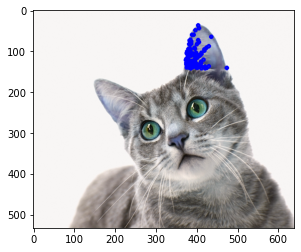

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

image = './PostingPic/cat.jpg'
img = cv2.imread(image)
plt.imshow(img)

img_object = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=40000)
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(img_object, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

count = 100
for i in matches[:count]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(img, (int(x1), int(y1)), 3, (0, 0, 255), 3)

plt.imshow(img)

### 오늘의 실습은 여기까지입니다.

긴 실습 수행하시느라 고생하셨습니다! 토요일에 뵐게요 :)